In [ ]:
import numpy as np
from scipy.stats import bernoulli
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from matplotlib import pyplot as plt
from sklearn.model_selection import validation_curve

# Data Collection
Here is where we can upload the data to our dataset.

Alex- Washington

Talia-California

Josh- Utah

Race Links: https://www.runningintheusa.com/classic/list/ut

In [ ]:
#Upload data here!
california_data = np.array([])

In [ ]:
class California_Evaluation():
  def __init__(self):
    self.dataset = [] #np.array([])   # keeps track of total dataset
    self.trainset = np.array([])  # training dataset
    self.testset = np.array([])   # testing dataset

  def add_data(self, data_point):
    """Adds a datapoint to our dataset.
          Arguments:
            data_point (np.darray)- datapoint entry
    """
    self.dataset.append(data_point)  # adding datapoint to total dataset

  def get_testset(self, per=.8):
    """Creates a test dataset and train dataset.
          Arguments:
            per (float)- percentage to divide original data by, ex. .8 puts ~80% data
                         into the train dataset, ~20% into the test dataset.
    """
    # Iterating through the dataset
    for data in self.dataset:
      if bernoulli.rvs(per):
        self.trainset = np.append(self.trainset, data)  # adding to trainset
      
      else:
        self.testset = np.append(self.testset, data)    # adding to testset
  
  def evaluate_output(self, plot='boxplot', y=None):
    """Evaluates the target values of our dataset.
          Arguments:
            plot (string)- type of plot we want to create.
              1. box plot
              2. violin plot
    """
    # Getting target values
    if y is None:
      dataset = np.array(self.dataset)
      y = dataset[:,-1].astype('int')   # changing dtype from object to int
    
    # Getting box plot
    if plot == 'boxplot':
      plt.boxplot(y, vert=False)
    
    # Getting violin plot
    else:
      plt.violinplot(y, vert=False)
    
    # Etc. plotting details
    plt.title('Target Evaulation')
    plt.xlabel('Number of Participants')
    plt.show()
  
  def normalizing_data(self):
    """Removes outliers, normalizies outputs, divides into X and y."""
    dataset = np.array(self.dataset)
    X = dataset[:,:-1]
    y = dataset[:,-1].astype('int')   # changing dtype from object to int

    # Removing outliers
    num_devs = 1.5    # number of deviations to keep
    X = X[abs(y-np.median(y)) < num_devs * np.std(y)]
    y = y[abs(y-np.median(y)) < num_devs * np.std(y)]

    # Normalizing data
    # we need to normalize X as well
    #y = (y - np.min(y))/(np.max(y) - np.min(y))

    # Updating None values in cost column with cost average
    costs = X[:,-2]
    costs[costs==None] = np.average(costs[costs!=None].astype('float'))

    st = X[:,-4]
    st[st==None] = np.average(st[st!=None].astype('float'))

    return X, y

CA = California_Evaluation()


def ca(title, loc, month, day, elv, len, st, multiple, cost, city_pop, num_par):
  """Helper function for loading data into my numpy array for the state of California.
  Parameters:
    1. title: name of race
    2. loc: race location
    3. month: month of year (1-12)
    4. day: day of week
          0- monday
          1- tuesday
          2- wednesday
          3- thursday
          4- friday
          5- saturday
          6- sunday
    4. elv: elevation (ft)
    5. len: length of race (km)
    8. st: start time in military time, without colon
    9: multiple: bool whether or not multiple races at that location, 1 True, 0 False
    12. cost: cost (USD)
    13. city_pop: population of the city
    14: num_par: number of participants (target)

  """
  CA.add_data(np.array([title, loc, month, day, elv, len, st, multiple, cost, city_pop, num_par]))

In [ ]:
#X[:,-4] 16/31

In [ ]:
9/31

0.2903225806451613

In [ ]:
ca('OC Pumpkin Run', 'Fullerton', 10, 5, 164, 5, 730, 0, 45, 139640, 414)
ca('E3 Family Fun Run', 'Rancho Cucamonga', 10, 5, 1180, 5, 745, 1, None, 177751, 186)
ca('E3 Family Fun Run', 'Rancho Cucamonga', 10, 5, 1180, 2, 745, 1, None, 177751, 146)
ca('Fit Foodie 5K/10K', 'San Diego', 10, 5, 49, 5, 800, 1, None, 1430000, 1325)

ca('Manhattan Beach GLOWTIDE 5k', 'Manhattan Beach', 12, 5, 120, 5, 1730, 0, 40, 35532, 196)
ca('Los Angeles Jingle Bell Run', 'Los Angeles', 12, 6, 285, 5, 700, 1, None, 3990000, 383)
ca('2019 Jingle Bell Run- OC', 'Corona', 12, 5, 679, 5, 800, 0, None, 168819, 184)
ca('Bret Harte Middle School Booster Club\'s Run Turkey Run', 'San Jose', 11, 3, 82, 5, 840, 1, 30, 1030000, 986)
ca('Bret Harte Middle School Booster Club\'s Run Turkey Run', 'San Jose', 11, 3, 82, 10, 840, 1, 30, 1030000, 219)

ca('Turkey Trot OC', 'Tustin', 11, 3, 138, 5, 800, 0, None, 79795, 505)
ca('Om Run', 'Los Gatos', 4, 6, 364, 5, 845, 1, None, 30680, 670)
ca('Om Run', 'Los Gatos', 4, 6, 364, 10,  830, 1, None, 30680, 306)
ca('Om Run', 'Los Gatos', 4, 6, 364, 21.1, 700, 1, None, 30680, 99)
ca('CA Best Friends 13.1 Relay', 'San Diego', 5, 5, 49, 21.1/2, 830, 1, 30, 1430000, 14)

ca('CA Best Friends 13.1 Relay', 'San Diego', 5, 5, 49, 21.1, 830, 1,  30, 1430000, 7)
ca('Fiesta Fun Run', 'Madera', 5, 5, 1019, 5, 830, 0, None, 65706, 76)
ca('Kevin Blain Legacy Run', 'Tulare', 5, 5, 14465, 5, 730, 1, 25, 64475, 96)
ca('Sonoma County Human Race', 'Santa Rosa', 5, 5, 164, 3, 800, 1, None, 177586, 40)
ca('Sonoma County Human Race', 'Santa Rosa', 5, 5, 164, 10, 800, 1, None, 177586, 83)

ca('Golden Gate Park 10k', 'San Francisco', 5, 6, 92, 10, 900, 0, 5, 881549, 214)
ca('Gator Run', 'Moorpark', 5, 6, 515, 5, 745, 1, None, 36576, 234)
ca('Gator Run', 'Moorpark', 5, 6, 515, 10, 730, 1, None, 36576, 56)
ca('Long Beach Pride Run', 'Long Beach', 5, 6, 3, 5, 800, 1, 35, 467354, 113)
ca('Long Beach Pride Run', 'Long Beach', 5, 6, 3, 10, 800, 1, 45, 467354, 61)

ca('Ladin Subaru 805 Strong 5k', 'Thousand Oaks', 12, 6, 500, 5, 730, 0, 40, 127690, 527)
ca('Santa Paws', 'Palm Springs', 12, 5, 479, 5, 900, 0, 45, 48375, 514)
ca('Zero Prostate Cancer Run/Walk', 'San Diego', 9, 5, 49, 5, 900, 0, 40, 1430000, 276)
ca('Village Runner 4th of July 5k Run', 'Redondo Beach', 7, 3, 62, 5, 800, 1, 38, 67412, 2179)
ca('Mission Hills 5k', 'San Diego', 4, 5, 49, 5, 800, 0, 35, 1430000, 417)

ca('St. Patrick\'s Day 5k Run', 'Redondo Beach', 3, 6, 62, 5, 800, 1, 38, 67412, 1249)
ca('Tails 2 Trails', 'Simi Valley', 3, 6, 768, 5, 900, 1, None, 125851, 48)
ca('Tails 2 Trails', 'Simi Valley', 3, 6, 768, 10, 900, 1, None, 125851, 16)

#USE THIS SITE!! https://my.racewire.com/results


In [ ]:
utah_data = np.array([])

def ut(title, loc, month, day, elv, len, st, multiple, cost, city_pop, num_par):
  """Helper function for loading data into my numpy array for the state of Utah.
  Parameters:
    1. title: name of race  # not to be given to model
    2. loc: race location   # not to be given to model
    3. month: month of year (1-12)                          # catagorical
    4. day: day of week                                     # cat
          0- monday
          1- tuesday
          2- wednesday
          3- thursday
          4- friday
          5- saturday
          6- sunday
    5. elv: elevation (ft)                                  # discrete
    6. len: length of race (km)                             # discrete
    7. st: start time in military time, without colon       # discrete
    8: multiple: bool whether or not multiple races at that location, 1 True, 0 False  # cat
    9. cost: cost (USD)                                     # discrete
    10. city_pop: population of the city                    # discrete
    11: num_par: number of participants (target)            # discrete

  """
  CA.add_data(np.array([title, loc, month, day, elv, len, st, multiple, cost, city_pop, num_par]))

In [ ]:
ut('St George Half', 'St. George', 1, 5, 2700, 21.08, 900, 1, 85, 84500, 582)
ut('Salt Lake Race Series 5k', 'Salt Lake City', 2, 5, 4226, 5, 800, 0, 35, 197756, 692)
ut('Candy Heart Run 5k', 'Midvale', 2, 5, 4383, 5, 900, 1, 45, 33318, 131)
ut('Sweethearts 5k', 'Bountiful', 2, 2, 4797, 5, 900, 1, 25, 43901, 247)
ut('Zions Half Marathon', 'Springdale', 2, 5, 4000, 21.08, 700, 0, 145, 346, 2186)
ut('Monument Valley Ultra', 'Monument Valley', 3, 5, 5200, 50, 700, 1, 40, 864, 97)
ut('Salt Lake Race Series 10k', 'Salt Lake City', 3, 5, 4226, 10, 800, 0, 45, 197756, 631)
ut('Southern Utah Half', 'Washington', 4, 5, 2792, 21.08, 700, 0, 75, 26583, 529)
ut('Provo City Half Marathon', 'Provo', 5, 5, 4551, 21.08, 700, 1, 70, 116403, 453)
ut('Provo City 5k', 'Provo', 5, 5, 4551, 5, 900, 1, 20, 116403, 231)
ut('Dino Half', 'Vernal', 5, 5, 5328, 21.08, 730, 1, 95, 10574, 239)
ut('Dino 5k', 'Vernal', 5, 5, 5328, 5, 800, 1, 35, 10574, 190)
ut('Salt Lake Race Series 15k', 'Salt Lake City', 4, 5, 4226, 15, 800, 0, 45, 197756, 554)
ut('Ogden Marathon', 'Ogden', 5, 5, 4941, 42.2, 700, 1, 55, 87773, 1067)
ut('Ogden Half Marathon', 'Ogden', 5, 5, 4941, 21.08, 700, 1, 50, 87773, 2856)
ut('Riverton Country', 'Brighton', 7, 5, 8707, 10, 800, 1, 15, 260, 174)
ut('Ogden 5k', 'Ogden', 5, 5, 4941, 5, 700, 1, 30, 87773, 495)
ut('South Mountain Half Marathon', 'Draper', 4, 5, 4501, 21.08, 700, 1, 55, 48319, 75)
ut('Park City 10k', 'Park City', 7, 5, 6900, 10, 800, 1, 40, 8504, 331)
ut('Park City 5k', 'Park City', 7, 3, 6900, 5, 800, 1, 50, 8504, 314)
ut('Utah Valley Marathon', 'Provo', 6, 5, 4551, 42.2, 600, 1, 110, 116403, 880)
ut('South Mountain 5k', 'Draper', 4, 5, 4501, 5, 730, 1, 20, 48319, 45)
ut('Utah Valley Half Marathon', 'Provo', 6, 5, 4551, 21.08, 600, 1, 100, 116403, 1187)
ut('Corner Canyon Half', 'Draper', 6, 5, 4501, 21.08, 630, 1, 55, 48319, 101)
ut('Jordan River Half Marathon', 'South Jordan', 9, 5, 4300, 21.08, 730, 0, 55, 74149, 124)
ut('Top of Utah Half', 'Logan', 8, 5, 4500, 21.08, 700, 1, 80, 51619, 766)
ut('Thankful 13', 'Lehi', 11, 3, 4491, 21.08, 745, 1, 70, 69724, 550)
ut('Mt Nebo Marathon', 'Payson', 8, 5, 4698, 42.2, 600, 1, 100, 19826, 292)
ut('Thankful 10k', 'Lehi', 11, 3, 4491, 10, 800, 1, 25, 69724, 405)
ut('Haunted Half', 'Provo', 10, 2, 4551, 21.08, 800, 1, 80, 116403, 1149)
ut('St. George Marathon', 'St. George', 10, 5, 2700, 42.2, 700, 0, 110, 84500, 3980)
ut('Frigid 5k', 'Provo', 1, 5, 4551, 5, 900, 0, 23, 116403, 549)
ut('Big Cottonwood Marathon', 'Salt Lake City', 9, 5, 4226, 42.2, 645, 1, 110, 197756, 1071)

In [ ]:
washington_data = np.array([])

def was(title, loc, month, day, elv, len, st, multiple, cost, city_pop, num_par):
  """Helper function for loading data into my numpy array for the state of Washington.
  Parameters:
    1. title: name of race  # not to be given to model
    2. loc: race location   # not to bet given
    3. month: month of year (1-12)                          # catagorical
    4. day: day of week                                     # cat
          0- monday
          1- tuesday
          2- wednesday
          3- thursday
          4- friday
          5- saturday
          6- sunday
    5. elv: elevation (ft)                                  # discrete
    6. len: length of race (km)                             # discrete
    7. st: start time in military time, without colon       # discrete
    8: multiple: bool whether or not multiple races at that location, 1 True, 0 False  # cat
    9. cost: cost (USD)                                     # discrete
    10. city_pop: population of the city                    # discrete
    11: num_par: number of participants (target)            # discrete

  """
  CA.add_data(np.array([title, loc, month, day, elv, len, st, multiple, cost, city_pop, num_par]))

In [ ]:
was('CNW Resolution Run', 'Seattle', 1, 2, 175, 5, 1030, 1, 40, 776555, 332)
was('Prance N Plunge', 'Bremerton', 1, 2, 39, 3.4, 1000, 0, None, 40631, 79)
was('Jayme Biendl Memorial Run', 'Monroe', 1, 6, 72, 5, 1000, 0, 30, 48241, 112)
was('Northwest Trail Runs Interlaken Icicle Dash 10K', 'Seattle', 2, 5, 175, 10, 730, 1, 33, 776555, 94)
was('Northwest Trail Runs Interlaken Icicle Dash 5K', 'Seattle', 2, 5, 175, 5, 730, 1, 33, 776555, 68)
was('Valentine\'s Day 5K', 'Olympia', 2, 5, 95, 5, 900, 0, 30, 51534, 372)
was('Leprechaun 5K', 'Bremerton', 3, 6, 39, 5, 915, 1, 1, 40631, 179)
was('Donut Dash 5K', 'Olympia', 3, 6, 95, 5, 900, 0, 30, 51534, 776) # num participants might be off
was('Best Friends - Langus River Trail', 'Everett', 4, 5, 82, 10, 830, 0, 50, 109766, 175) # might have to be used as a prediction, set output to avg of washington
was('Flight for Sight Fun Run 10K', 'Everett', 6, 5, 82, 10, 900, 1, 30, 109766, 12)
was('Flight for Sight Fun Run 5K', 'Everett', 6, 5, 82, 5, 900, 1, 30, 109766, 30)
was('Roosevelt 5K', 'Olympia', 6, 5, 95, 5, None, 0, None, 51434, 210)
was('5K Race & Walk for Humanity', 'Seattle', 7, 5, 175, 5, 1000, 0, None, 776555, 64)
was('Everett AquaSox 5K', 'Everett', 7, 5, 82, 5, 930, 0, None, 109766, 238)
was('U District Summer Series', 'Spokane', 7, 1, 1843, 5, None, 1, None, 217353, 595)
was('SpoKenya Run', 'Spokane', 7, 5, 1843, 7, 900, 0, 29, 217252, 624)
was('Glow Run 5K', 'Olympia', 7, 4, 95, 5, 900, 0, 35, 51534, 284)
was('Shorelilne Sports Foundation Sports Jam 5K', 'Seattle', 8, 5, 1030, 5, 900, 0, 25, 776555, 175) #rip, set output to avg of washington
was('Race for the Homeless 10K', 'Vancouver', 8, 5, 171, 10, 800, 1, 15, 180556, 140)
was('Stilly Fun Run', 'Arlington', 8, 5, 115, 5, 900, 0, 15, 19483, 65)
was('Woodland Park Zoom 10K', 'Seattle', 9, 1, 175, 10, 1500, 1, 31, 776555, 17)
was('Woodland Park Zoom 5K', 'Seattle', 9, 1, 175, 5, 1500, 1, 27, 776555, 39)
was('Seattle Run Series - Fal Series at Alki Beach - Race #1 10K', 'Seattle', 9, 6, 175, 10, None, 1, None, 776555, 200)
was('Seattle Run Series - Fall Series at Alki Beach - Race #1 5K', 'Seattle', 9, 6, 175, 5, None, 1, None, 776555, 250)
was('Run the Mountain - 15K', 'Issaquah', 9, 5, 108, 15, 900, 1, 55, 37965, 10)
was('Run the Mountain - 10K', 'Issaquah', 9, 5, 108, 10, 900, 1, 55, 37965, 30)
was('Run the Mountain - 5K', 'Issaquah', 9, 5, 108, 5, 900, 1, 55, 37965, 40)
was('Emerald City Open - 4K', 'Seattle', 9, 5, 175, 4, 1000, 1, 10, 776555, 10)
was('Emerald City Open - 2K', 'Seattle', 9, 5, 175, 2, 1000, 1, 10, 776555, 80)
was('Spooktacular 5K Sprint', 'Olympia', 10, 5, 95, 5, 900, 0, 30, 51534, 180)
was('Deception Pass 25K', 'Oak Harbor', 12, 6, 92, 25, 900, 1, None, 23089, 100)
was('Auburn Turkey Trot 5K', 'Auburn', 11, 3, 1227, 5, None, 0, None, 64054, 122)

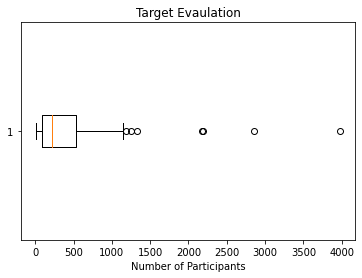

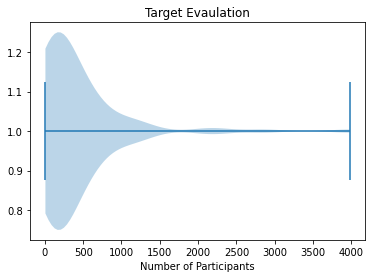

In [ ]:
CA.evaluate_output(plot='boxplot')
CA.evaluate_output(plot='violin')

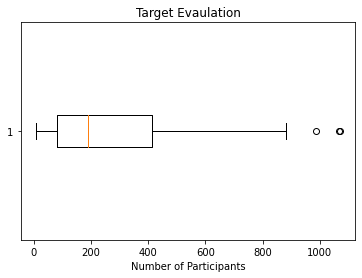

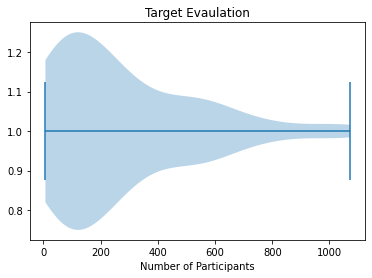

In [ ]:
X, y = CA.normalizing_data()
CA.evaluate_output(y = y)
CA.evaluate_output(plot='violin', y = y)

In [ ]:
#title, loc, month, day, elv, len, st, multiple, cost, city_pop, num_par]))
X = X[:,[2,3,4,6,8,9]]

In [ ]:
def condenseX(X):
  XNormal = copy.deepcopy(X)
  XNormal = XNormal / XNormal.max(axis=0)
  return np.sum(XNormal, axis=0)


In [ ]:
def destringifyX(X):
  for i in range(X.shape[0]):
    for j in range(X.shape[1]):
      X[i][j] = float(X[i][j])

In [ ]:
def bin_dataset(y, num_bins): # bin by height

    a = len(y)
    y2 = np.sort(y)
    n = int(a / num_bins)
    n = int(a / num_bins)
    for i in range(0, num_bins):
        arr = []
        for j in range(i * n, (i + 1) * n):
            if j >= a:
                break
            arr = arr + [y2[j]]
        print(arr)

bin_dataset(y, 4)

[7, 14, 16, 40, 48, 56, 61]
[76, 83, 96, 99, 113, 146, 184]
[186, 196, 214, 219, 234, 276, 306]
[383, 414, 417, 505, 514, 527, 670]


In [ ]:
new_y = []
for y_val in y:
  if y_val < 300:
    new_y.append(0)
  elif y_val < 600:
    new_y.append(1)
  elif y_val < 900:
    new_y.append(2)
  else:
    new_y.append(3)

y = np.array(new_y)
  

In [ ]:
y

array([1, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0])

Output Classes

0: x < 0.068 ~ < 80

1: 0.068 <= x < 0.17 ~ < 190

2: 0.17 <= x < 0.375 ~ < 410

3: x >= 0.375 ~ >= 410

In [ ]:
print(y)
# bins y y height
#for i in range(y.shape[0]):
#  if y[i] < 80:
#    y[i] = 0
#  elif y[i] < 190:
#    y[i] = 1
#  elif y[i] < 410:
#    y[i] = 2
#  else:
#    y[i] = 3

print(y)

[1 0 0 0 1 0 3 0 1 2 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 2 0 0 0 2 1 1
 0 0 0 1 3 0 1 0 1 1 2 0 0 0 2 1 0 1 1 3 1 0 0 0 0 1 0 2 0 0 0 0 0 0 1 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 1 0 3 0 1 2 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 2 0 0 0 2 1 1
 0 0 0 1 3 0 1 0 1 1 2 0 0 0 2 1 0 1 1 3 1 0 0 0 0 1 0 2 0 0 0 0 0 0 1 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


# Random Guess



In [ ]:
from sklearn.model_selection import train_test_split
import random

Max Score =  0.5
Min Score =  0.06666666666666667
Avg Score =  0.245


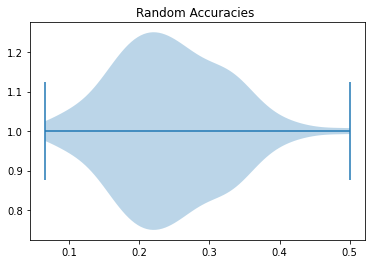

In [ ]:
r_scores = np.zeros(100)

for i in range(100):
  trainRX, testRX, trainRy, testRy = train_test_split(X, y, test_size=0.33)

  num_correct = 0
  for t_y in testRy:
    if random.randint(0,3) == t_y:
      num_correct += 1
  
  r_scores[i] = float(num_correct)/float(testRy.shape[0])

print("Max Score = ", np.amax(r_scores))
print("Min Score = ", np.amin(r_scores))
print("Avg Score = ", np.mean(r_scores))

plt.violinplot(r_scores, vert=False)
plt.title("Random Accuracies ")
plt.show()

# WHAT MODEL ARE WE USING?
- Perceptron - Alex
- Backprop - Taila
- Decision Tree - Josh
- KNN - Alex (Did this one for fun)

# Decision Tree

In [ ]:
from sklearn import tree
import copy

In [ ]:
values = copy.deepcopy(X)
values = values[:,2:]
values = values.astype('float')#np.round(values, 4)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(values, y, test_size=0.33, random_state=42)

Max Score =  0.5333
Min Score =  0.5
Avg Score =  0.5167


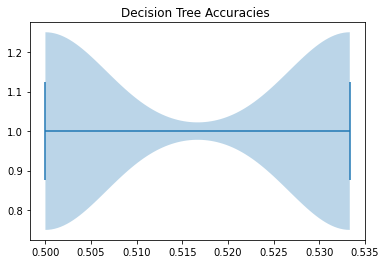

In [ ]:
dt_scores = []

for i in range(100):
  dt = tree.DecisionTreeClassifier(max_depth=30, criterion='entropy')
  dt = dt.fit(X_train, y_train)
  dt_scores.append(dt.score(X_test, y_test))

dt_scores = np.array(dt_scores)

print("Max Score = ", np.round(np.amax(dt_scores),4))
print("Min Score = ", np.round(np.amin(dt_scores), 4))
print("Avg Score = ", np.round(np.mean(dt_scores), 4))

plt.violinplot(dt_scores, vert=False)
plt.title("Decision Tree Accuracies ")
plt.show()

# Backprop

back prop info:

layer size: 55, lr: .1

Max Score =  0.3667
Min Score =  0.2
Avg Score =  0.2417

layer size: 55, lr: .01 

Max Score =  0.43333333333333335
Min Score =  0.13333333333333333
Avg Score =  0.29766666666666663


layer size: 55 lr: .001 

Max Score =  0.5
Min Score =  0.16666666666666666
Avg Score =  0.288

layer size: 55 lr: .0001 

Max Score =  0.4
Min Score =  0.1
Avg Score =  0.2463

layer size: 55 lr: .00001 

Max Score =  0.4
Min Score =  0.1667
Avg Score =  0.25

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Max Score =  0.5
Min Score =  0.2
Avg Score =  0.34


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


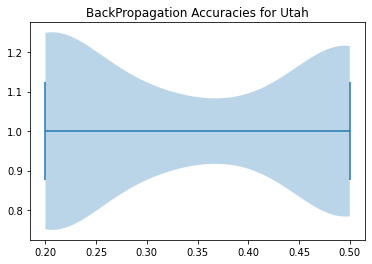

In [ ]:
from sklearn.neural_network import MLPClassifier as BackProp

scores = []

for i in range(100):
  B = BackProp(hidden_layer_sizes=150, activation='relu', learning_rate_init=.01, max_iter=500)
  B.fit(X_train, y_train)
  
  scores.append(B.score(X_test, y_test))

scores = np.array(scores)

print("Max Score = ", np.round(np.amax(scores),4))
print("Min Score = ", np.round(np.amin(scores), 4))
print("Avg Score = ", np.round(np.mean(scores), 4))

plt.violinplot(scores, vert=False)
plt.title("BackPropagation Accuracies for Utah")
plt.show()

In [ ]:
B.predict(X_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1])

In [ ]:
y_test

array([0, 0, 2, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2,
       0, 0, 0, 0, 0, 2, 0, 0])

In [ ]:
y_train

array([0, 1, 1, 0, 3, 2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 3, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2])

# Perceptron


In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
import copy

Max Score =  0.8
Min Score =  0.0
Avg Score =  0.385


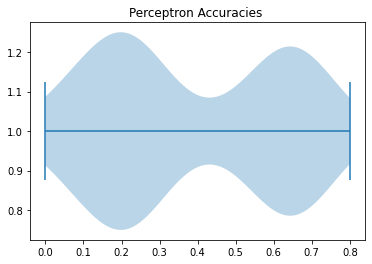

TypeError: ignored

In [ ]:
percp_X = copy.deepcopy(X)
percp_y = copy.deepcopy(y)

percp_X = np.split(percp_X, [2], 1)[1]
per_scores = np.zeros(100)

for i in range(100):
  trainPX, testPX, trainPy, testPy = train_test_split(percp_X, percp_y, test_size=0.33)

  percp = Perceptron(random_state=True, shuffle=True)
  percp.fit(trainPX, trainPy)

  per_scores[i] = percp.score(testPX, testPy)

print("Max Score = ", np.amax(per_scores))
print("Min Score = ", np.amin(per_scores))
print("Avg Score = ", np.mean(per_scores))

plt.violinplot(per_scores, vert=False)
plt.title("Perceptron Accuracies ")
plt.show()

trainPX, testPX, trainPy, testPy = train_test_split(percp_X, percp_y, test_size=0.33)
percp = Perceptron(random_state=True, shuffle=True)
percp.fit(trainPX, trainPy)

predictions = percp.predict(testPX)
XCondense = condenseX(testPX)

plt.plot(XCondense, predictions)
plt.plot(XCondense, testPy, "bo")
plt.show()

# KNN 

KNN info:

k = 3 seems to be best.

Normalization seems to decrease accuracy.

No other settings seem to have a noticable impact beyond normal settings


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

Max Score =  0.7333333333333333
Min Score =  0.4
Avg Score =  0.5966666666666667


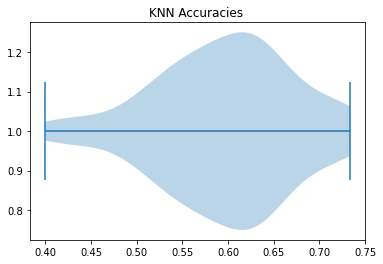

In [ ]:
knn_scores = np.zeros(100)

# destringifyX(KnnX)

KnnX = np.split(X, [2], 1)[1]

#print("unnormalized: ", KnnX)
#KnnX = KnnX / KnnX.max(axis=0)
#print("normalized: ", KnnX)

for i in range(100):
  trainKX, testKX, trainKy, testKy = train_test_split(KnnX, y, test_size=0.33)

  neigh = KNeighborsClassifier(n_neighbors=3)
  neigh.fit(trainKX, trainKy)

  knn_scores[i] = neigh.score(testKX, testKy)

print("Max Score = ", np.amax(knn_scores))
print("Min Score = ", np.amin(knn_scores))
print("Avg Score = ", np.mean(knn_scores))

plt.violinplot(knn_scores, vert=False)
plt.title("KNN Accuracies ")
plt.show()